In [823]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [824]:
gender_data  = pd.read_csv("gender_submission.csv")
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [825]:
## pclass = ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd 
## embarked = Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton 

In [826]:
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [827]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [828]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [829]:
## insert gender data into test data so test+train is uniform
test_data.insert(1,"Survived", gender_data["Survived"])

In [830]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [831]:
## cleaning train_data + visualising
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [832]:
## drop Name, Embarked & Cabin columns - not of any value + Cabin missing too many values 
train_data.drop("Name", axis=1, inplace=True)
train_data.drop("Cabin", axis=1, inplace=True)
train_data.drop("Embarked", axis=1, inplace=True)


In [833]:
## change Ticket column to numeric data type as has numeric values 
train_data["Ticket"] = pd.to_numeric(train_data["Ticket"], errors = "coerce")


In [834]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       661 non-null    float64
 8   Fare         891 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 62.8+ KB


In [835]:
## are there any duplicated rows?
train_data.duplicated().keep=False

In [836]:
## dealing with null values 
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket         230
Fare             0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

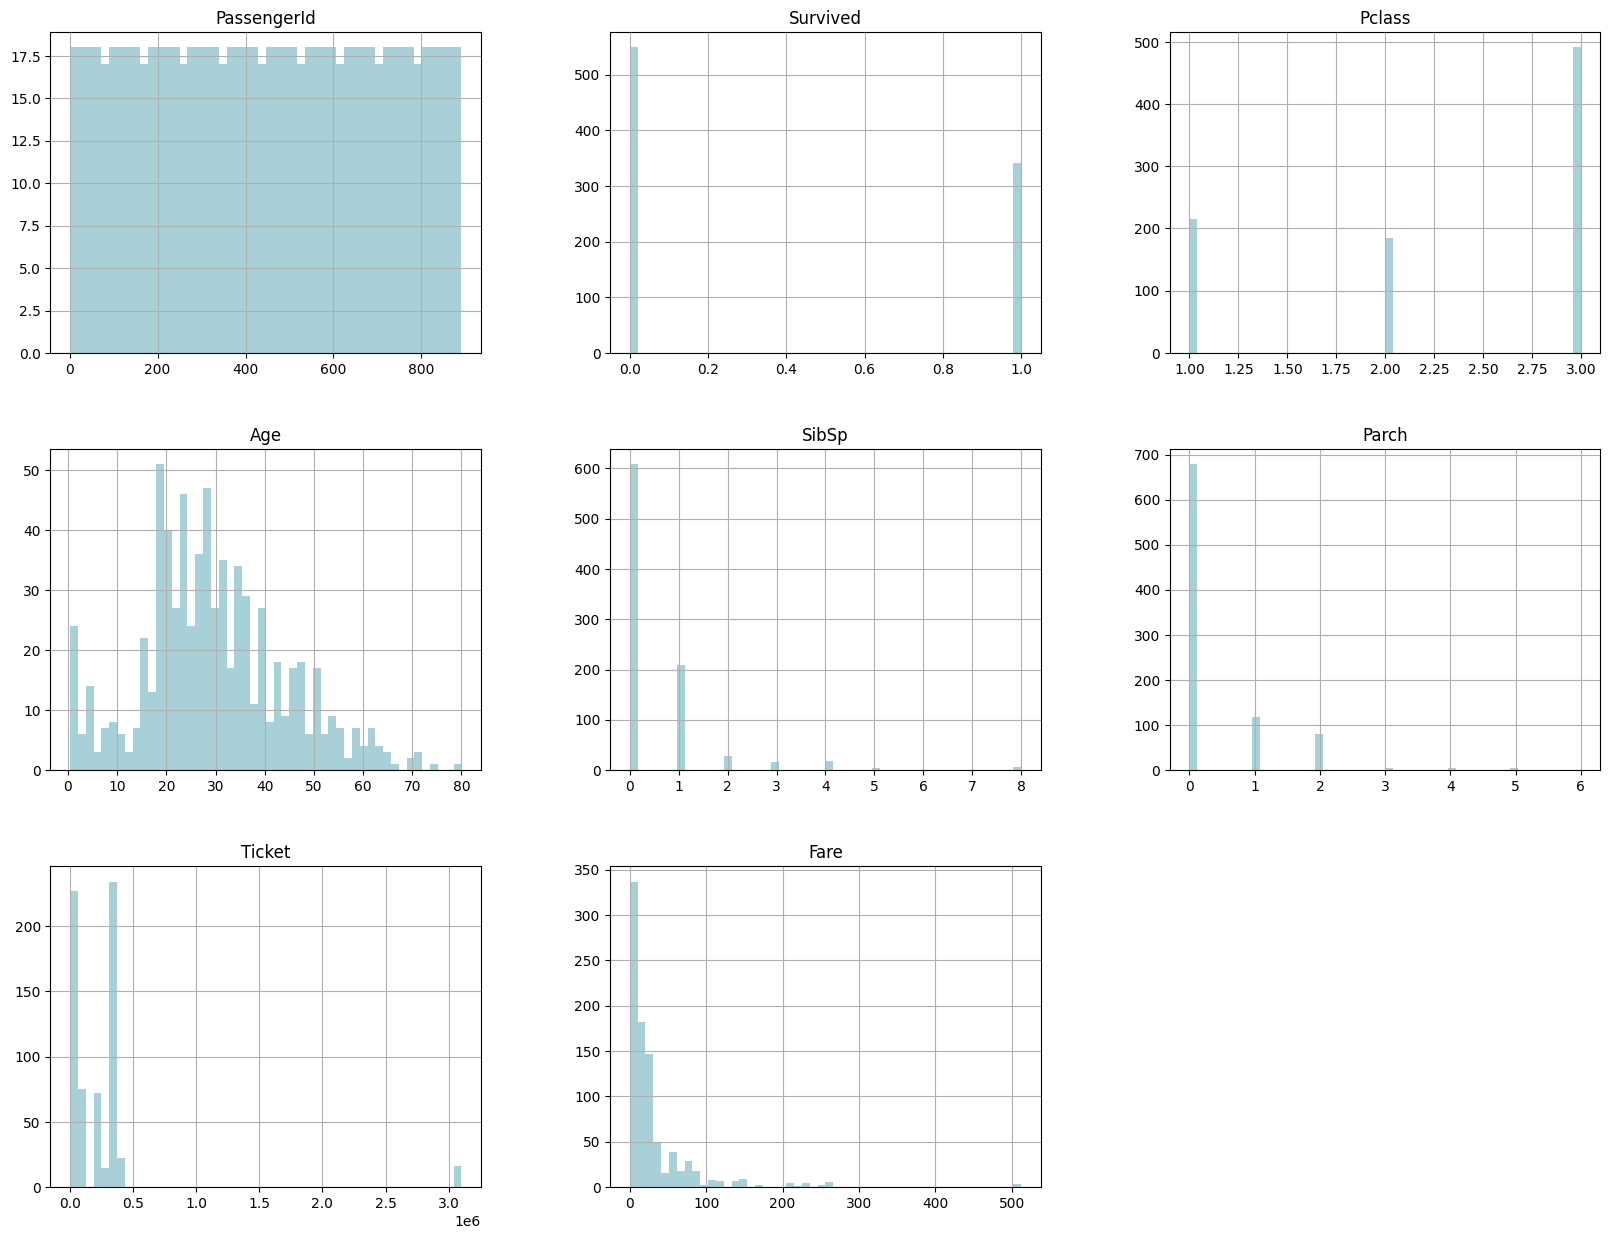

In [837]:
## skew of data 
train_data.hist(bins=50, figsize=(20, 15), color = "#A7D0D9")
plt.show

In [838]:
## replacing null values in Age and Ticket 
train_data["Age"].fillna(train_data["Age"].mean(), inplace=True)
train_data["Ticket"].fillna(train_data["Ticket"].median(),inplace = True)

<Axes: >

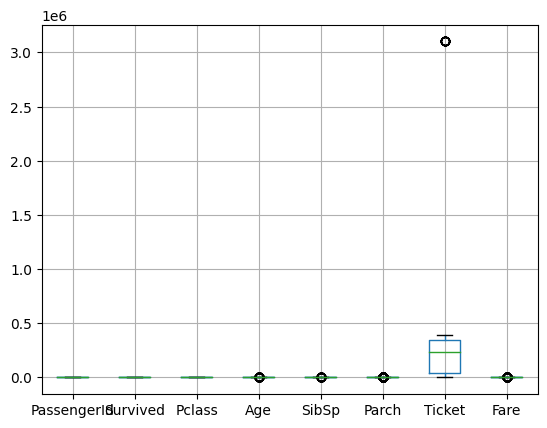

In [839]:
## checking for outliers
train_data.boxplot()


In [840]:
""" ## checking for and dropping the outliers in ticket 
for x in ["Ticket"]:
    q75, q25 = np.percentile(train_data.loc[:,x], [75,25])
    intr_qr = q75 - q25 

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
train_data.loc[train_data[x] < min,x] = np.nan
train_data.loc[train_data[x] > max,x] = np.nan 
now outliers are null values 
"""

' ## checking for and dropping the outliers in ticket \nfor x in ["Ticket"]:\n    q75, q25 = np.percentile(train_data.loc[:,x], [75,25])\n    intr_qr = q75 - q25 \n\nmax = q75+(1.5*intr_qr)\nmin = q25-(1.5*intr_qr)\ntrain_data.loc[train_data[x] < min,x] = np.delete\ntrain_data.loc[train_data[x] > max,x] = np.delete '

In [841]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

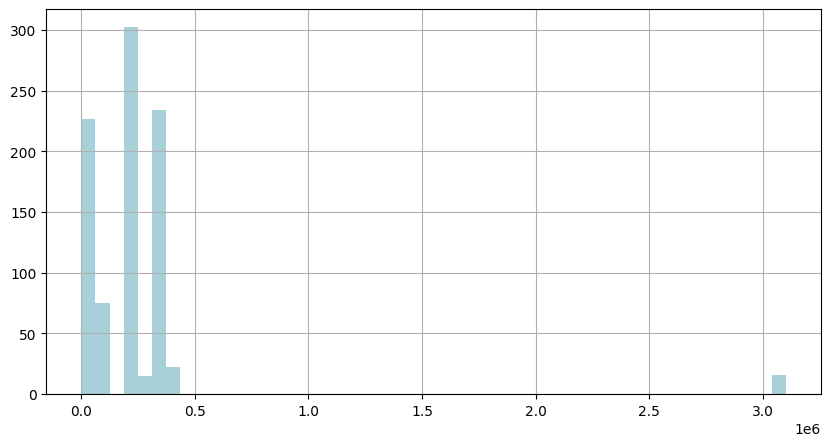

In [842]:
train_data["Ticket"].hist(bins=50, figsize=(10, 5), color = "#A7D0D9")
plt.show

In [843]:
## how many people survived
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

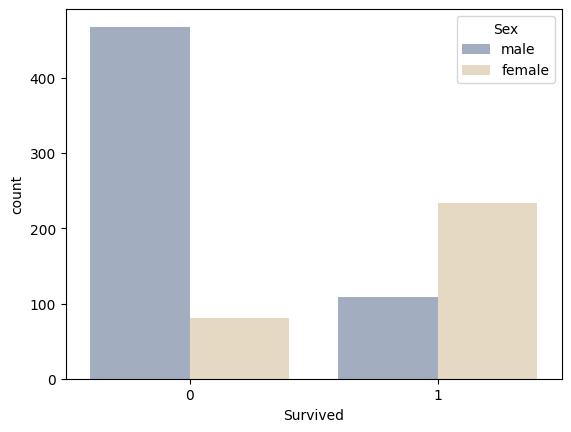

In [844]:
#How many people survived by sex?
colour = ["#9EABC5", "#EBDBBD"]
sns.countplot(x="Survived", hue="Sex", data=train_data, palette=colour)


<Axes: xlabel='Survived', ylabel='count'>

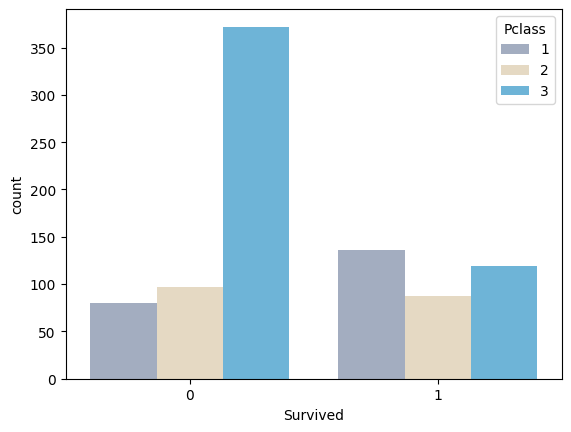

In [930]:
#How many people survived by Pclass?
colour = ["#9EABC5", "#EBDBBD", "#5DBAe8"]
sns.countplot(x="Survived", hue="Pclass", data=train_data, palette=colour)

In [845]:
## test data cleaning
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [846]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [847]:
## dropping the name, cabin, and embarked columns
test_data.drop("Name", axis=1, inplace=True)
test_data.drop("Cabin", axis=1, inplace=True)
test_data.drop("Embarked", axis=1, inplace=True)


In [848]:
## change Ticket column to numeric data type as has numeric values 
test_data["Ticket"] = pd.to_numeric(test_data["Ticket"], errors = "coerce")

In [849]:
## are there any duplicated rows?
test_data.duplicated().keep=False

In [850]:
## checking for null values
test_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket         122
Fare             1
dtype: int64

In [851]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       296 non-null    float64
 8   Fare         417 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 29.5+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

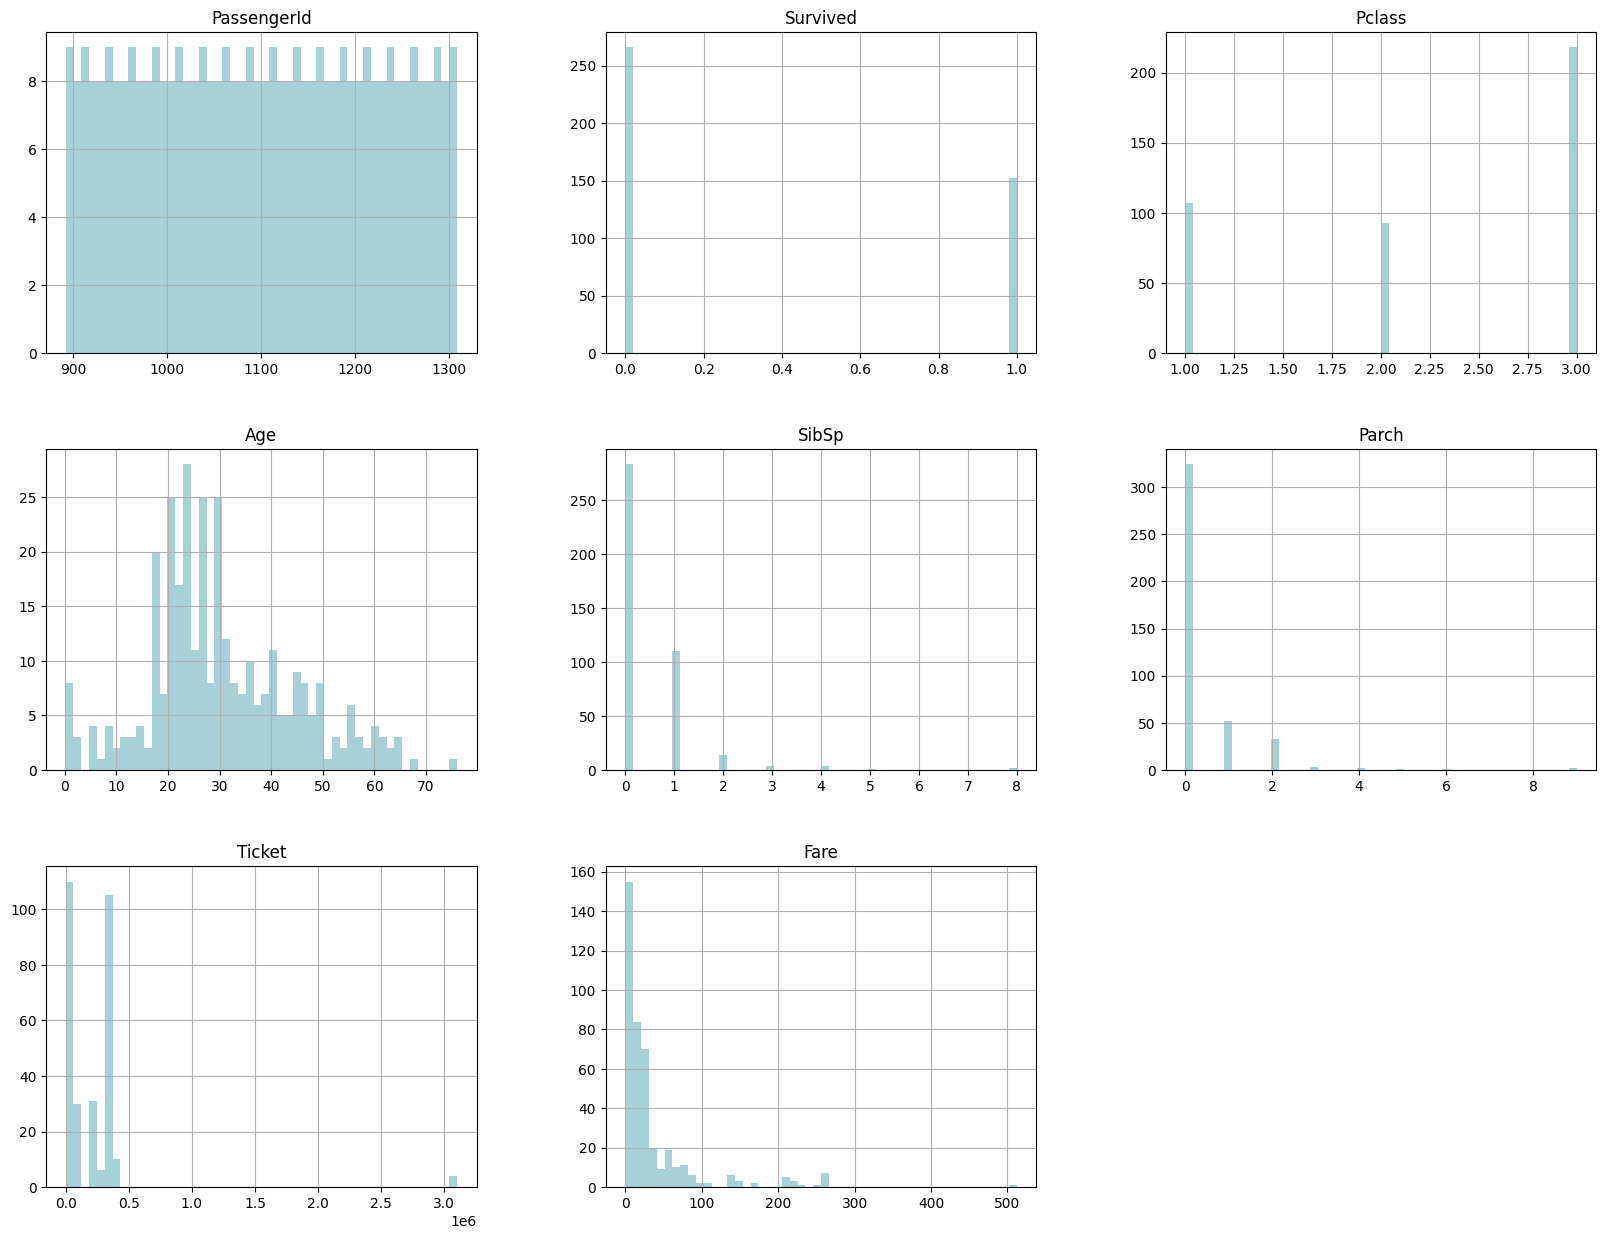

In [852]:
## skew of data 
test_data.hist(bins=50, figsize=(20, 15), color = "#A7D0D9")
plt.show

In [853]:
## replacing null values in Age, Fare and Ticket 
test_data["Age"].fillna(test_data["Age"].mean(), inplace=True)
test_data["Ticket"].fillna(test_data["Ticket"].median(),inplace = True)
test_data["Fare"].fillna(test_data["Fare"].median(),inplace = True)


<Axes: >

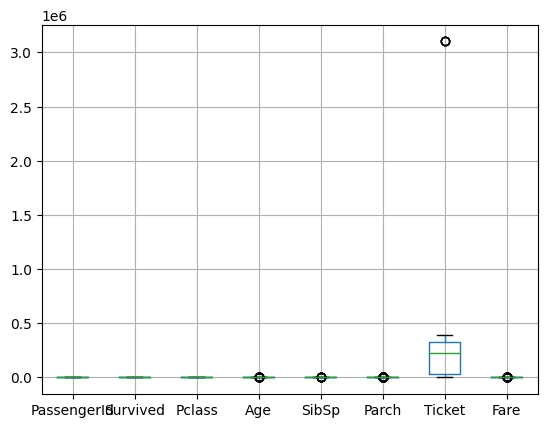

In [854]:
## checking for outliers
test_data.boxplot()


In [855]:
""" ## checking for and dropping those outliers in ticket 
for x in ["Ticket"]:
    q75, q25 = np.percentile(test_data.loc[:,x], [75,25])
    intr_qr = q75 - q25 

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
test_data.loc[test_data[x] < min,x] = np.nan
test_data.loc[test_data[x] > max,x] = np.nan """

' ## checking for and dropping those outliers in ticket \nfor x in ["Ticket"]:\n    q75, q25 = np.percentile(test_data.loc[:,x], [75,25])\n    intr_qr = q75 - q25 \n\nmax = q75+(1.5*intr_qr)\nmin = q25-(1.5*intr_qr)\ntest_data.loc[test_data[x] < min,x] = np.delete\ntest_data.loc[test_data[x] > max,x] = np.delete '

In [856]:
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,2.540852e+05,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,4.062622e+05,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,6.930000e+02,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,3.697000e+04,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,2.361710e+05,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,3.457695e+05,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,3.101298e+06,512.329200


In [858]:
## outliers in Ticket, Age, SibSp, Parch & Fare in both train_data and test_data


In [859]:
""" mean = np.mean(train_data["Age"])
std = np.std(train_data["Age"])

threshold = 3
outliers = []
for x in train_data["Age"]:
    z_score = (x-mean)/std
    if abs(z_score)>threshold:
        outliers.append(x)

print ("Mean: ", mean)
print ("Standard deviation: ", std)
print ("Outliers: ", outliers) """

' mean = np.mean(train_data["Age"])\nstd = np.std(train_data["Age"])\n\nthreshold = 3\noutliers = []\nfor x in train_data["Age"]:\n    z_score = (x-mean)/std\n    if abs(z_score)>threshold:\n        outliers.append(x)\n\nprint ("Mean: ", mean)\nprint ("Standard deviation: ", std)\nprint ("Outliers: ", outliers) '

In [860]:
## label encoding of sex column 
## Male = 1 
## Female = 0
label_encoder = preprocessing.LabelEncoder()
train_data["Sex"] = label_encoder.fit_transform(train_data["Sex"])


In [862]:
## what are the correlations between the variables and survived passengers?
corr = train_data.corr()
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,-0.063767,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,-0.105427,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,0.237038,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,0.039407,-0.182333
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,-0.128012,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.183573,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.074217,0.216225
Ticket,-0.063767,-0.105427,0.237038,0.039407,-0.128012,0.183573,0.074217,1.000000,-0.090963
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,-0.090963,1.000000


In [863]:
## making it easier to see the features correlated with survival 
corr["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Ticket        -0.105427
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

In [931]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,1,22.0,1,0,236171.0,7.2500
1,2,1,1,0,38.0,1,0,236171.0,71.2833
2,3,1,3,0,26.0,0,0,236171.0,7.9250
3,4,1,1,0,35.0,1,0,113803.0,53.1000
4,5,0,3,1,35.0,0,0,373450.0,8.0500


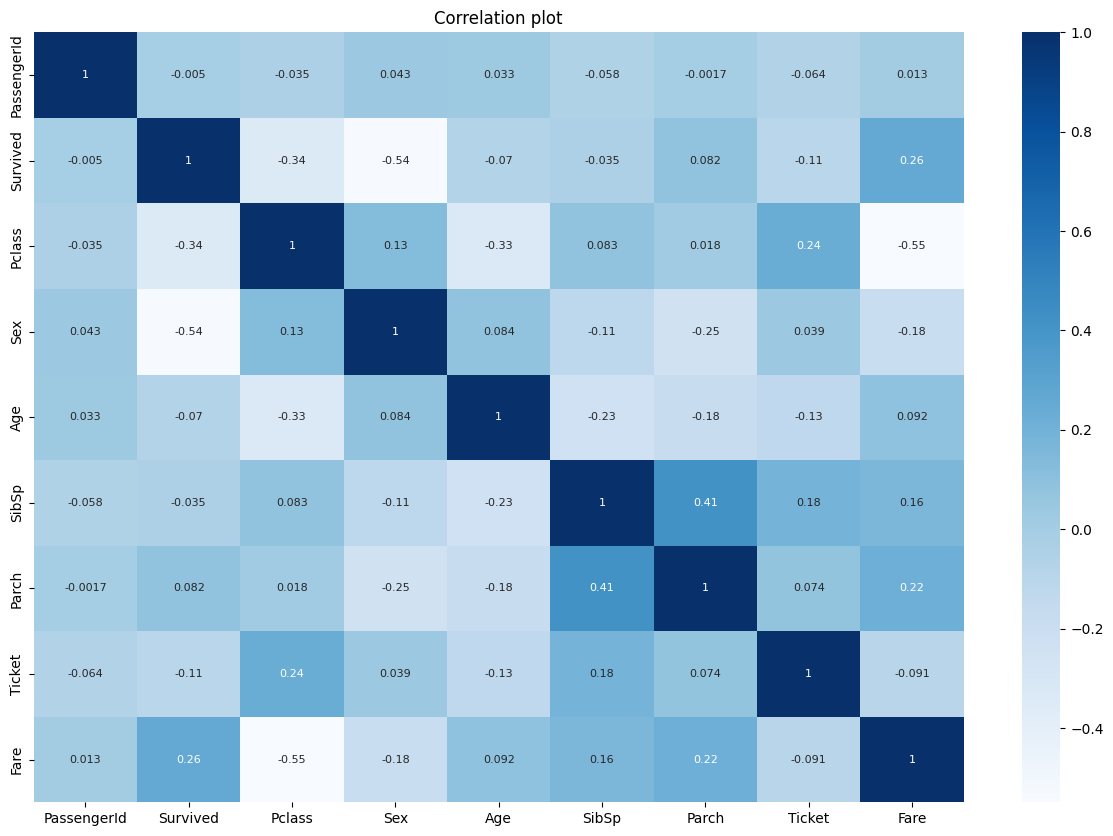

In [864]:
## heatmap 
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot= True, cmap= "Blues", annot_kws={"size" : 8}) 
plt.title('Correlation plot', loc = "center")
plt.show()

In [865]:
## split the dataset 
x_train = train_data.drop("Survived", axis=1).values
y_train = train_data["Survived"]
x_test = test_data.drop("Survived", axis=1).values
y_test = test_data["Survived"]

In [866]:
x_train

array([[1.00000e+00, 3.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.36171e+05, 7.25000e+00],
       [2.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.36171e+05, 7.12833e+01],
       [3.00000e+00, 3.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.36171e+05, 7.92500e+00],
       ...,
       [8.89000e+02, 3.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        2.36171e+05, 2.34500e+01],
       [8.90000e+02, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.11369e+05, 3.00000e+01],
       [8.91000e+02, 3.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        3.70376e+05, 7.75000e+00]])

In [867]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [868]:
x_test

array([[8.92000e+02, 3.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        3.30911e+05, 7.82920e+00],
       [8.93000e+02, 3.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.63272e+05, 7.00000e+00],
       [8.94000e+02, 2.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.40276e+05, 9.68750e+00],
       ...,
       [1.30700e+03, 3.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.30136e+05, 7.25000e+00],
       [1.30800e+03, 3.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        3.59309e+05, 8.05000e+00],
       [1.30900e+03, 3.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        2.66800e+03, 2.23583e+01]])

In [869]:
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [870]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,1,22.000000,1,0,236171.0,7.2500
1,2,1,1,0,38.000000,1,0,236171.0,71.2833
2,3,1,3,0,26.000000,0,0,236171.0,7.9250
3,4,1,1,0,35.000000,1,0,113803.0,53.1000
4,5,0,3,1,35.000000,0,0,373450.0,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,211536.0,13.0000
887,888,1,1,0,19.000000,0,0,112053.0,30.0000
888,889,0,3,0,29.699118,1,2,236171.0,23.4500
889,890,1,1,1,26.000000,0,0,111369.0,30.0000


In [871]:
## selecting the dependant and independant variable 
## trying different data selection
x = train_data.iloc[:, [2, 3, 6, 8]].values
y = train_data.iloc[:, 1].values

In [872]:
x

array([[ 3.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    , 71.2833],
       [ 3.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  0.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    ,  0.    , 30.    ],
       [ 3.    ,  1.    ,  0.    ,  7.75  ]])

In [873]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [874]:
## split our dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [875]:
x_train

array([[ 3.    ,  0.    ,  0.    ,  8.85  ],
       [ 3.    ,  0.    ,  0.    , 16.1   ],
       [ 3.    ,  1.    ,  1.    , 20.2125],
       ...,
       [ 1.    ,  0.    ,  0.    , 83.1583],
       [ 1.    ,  1.    ,  0.    , 26.55  ],
       [ 3.    ,  0.    ,  0.    ,  7.7375]])

In [876]:
x_test

array([[  3.    ,   1.    ,   0.    ,   8.05  ],
       [  1.    ,   0.    ,   0.    , 133.65  ],
       [  1.    ,   0.    ,   0.    ,  89.1042],
       [  3.    ,   1.    ,   0.    ,   7.7375],
       [  2.    ,   1.    ,   0.    ,   0.    ],
       [  1.    ,   0.    ,   0.    ,  66.6   ],
       [  3.    ,   1.    ,   0.    ,  56.4958],
       [  3.    ,   1.    ,   0.    ,   9.5   ],
       [  3.    ,   1.    ,   0.    ,   7.8958],
       [  2.    ,   1.    ,   1.    ,  33.    ],
       [  3.    ,   1.    ,   0.    ,   7.775 ],
       [  1.    ,   0.    ,   0.    ,  31.    ],
       [  2.    ,   1.    ,   0.    ,  13.    ],
       [  1.    ,   1.    ,   0.    ,  52.    ],
       [  1.    ,   0.    ,   0.    , 146.5208],
       [  3.    ,   1.    ,   0.    ,   7.75  ],
       [  2.    ,   1.    ,   1.    ,  11.5   ],
       [  3.    ,   1.    ,   0.    ,   7.8958],
       [  1.    ,   1.    ,   0.    , 135.6333],
       [  3.    ,   0.    ,   0.    ,  23.25  ],
       [  2.    ,   

In [877]:
## if get rid of outliers - plot histo and standardise instead?

In [878]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,1,22.000000,1,0,236171.0,7.2500
1,2,1,1,0,38.000000,1,0,236171.0,71.2833
2,3,1,3,0,26.000000,0,0,236171.0,7.9250
3,4,1,1,0,35.000000,1,0,113803.0,53.1000
4,5,0,3,1,35.000000,0,0,373450.0,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,211536.0,13.0000
887,888,1,1,0,19.000000,0,0,112053.0,30.0000
888,889,0,3,0,29.699118,1,2,236171.0,23.4500
889,890,1,1,1,26.000000,0,0,111369.0,30.0000


In [879]:
## standardisation 
## input data is transformed to have a mean of 0 and variance of 1 
## dont fit x_test only transform so no overfitting 
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

In [880]:
## logistic regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [881]:
## make prediction 
y_pred = log_reg.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0])

In [882]:
## get the result in a dataframe 
result = {"Actual_survived":y_test, "Predicted_survived": y_pred}
result_df = pd.DataFrame(result)
result_df

,Actual_survived,Predicted_survived
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
174,1,0
175,1,1
176,0,0
177,1,1


In [883]:
## accuracy 
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7932960893854749


In [926]:
confusion_matrix(y_test, y_pred)

array([[93, 15],
       [22, 49]])

In [928]:
""" from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average = "macro") """ 


0.7800033217073576

In [884]:
""" normalizer_x = preprocessing.Normalizer()
x_train = normalizer_x.fit_transform(x_train)
x_test = normalizer_x.transform(x_test)  """

' normalizer_x = preprocessing.Normalizer()\nx_train = normalizer_x.fit_transform(x_train)\nx_test = normalizer_x.transform(x_test)  '

In [920]:
## fit our knn model
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [921]:
## make prediction
y_pred_knn = knn_model.predict(x_test)

In [922]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_knn))

Accuracy: 0.8435754189944135


In [888]:
## decision tree model
decisiontree_gini = DecisionTreeClassifier()

In [889]:
## use max depth
decisiontree_depth = DecisionTreeClassifier(max_depth=2)

In [890]:
##use entropy criterion
decisiontree_entropy =DecisionTreeClassifier(criterion='entropy')

In [891]:
## fit the trees
decisiontree_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [892]:
decisiontree_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [893]:
decisiontree_depth.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [894]:
## make prediction
y_pred_gini = decisiontree_gini.predict(x_test)

In [895]:
y_pred_entropy = decisiontree_entropy.predict(x_test)

In [896]:

y_pred_depth = decisiontree_depth.predict(x_test)

In [897]:
print('Accuracy (gini):', metrics.accuracy_score(y_test, y_pred_gini))
print('Accuracy (enthropy):', metrics.accuracy_score(y_test, y_pred_entropy))
print('Accuracy (maxdepth):', metrics.accuracy_score(y_test, y_pred_depth))

Accuracy (gini): 0.8156424581005587
Accuracy (enthropy): 0.8268156424581006
Accuracy (maxdepth): 0.7653631284916201


In [898]:
## create an object for svm
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid')
clfrbf = svm.SVC(kernel='rbf')

In [899]:
## train the model 
clfLinear.fit(x_train, y_train)
clfsigmoid.fit(x_train, y_train)
clfrbf.fit(x_train, y_train)

SVC()

In [900]:
## make prediction
y_pred_linear = clfLinear.predict(x_test)
y_pred_sigmoid = clfsigmoid.predict(x_test)
y_pred_rbf = clfrbf.predict(x_test)

In [901]:
## model accuracy
print('Accuracy (linear):', metrics.accuracy_score(y_test, y_pred_linear))
print('Accuracy (sigmoid):', metrics.accuracy_score(y_test, y_pred_sigmoid))
print('Accuracy (rbf):', metrics.accuracy_score(y_test, y_pred_rbf))


Accuracy (linear): 0.7932960893854749
Accuracy (sigmoid): 0.6927374301675978
Accuracy (rbf): 0.7988826815642458
